## TCS.NS Stock Price Prediction
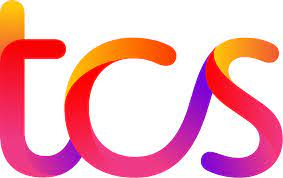
TCS.NS refers to the stock symbol for Tata Consultancy Services Limited, listed on the National Stock Exchange of India. Tata Consultancy Services (TCS) is a multinational information technology services and consulting company. With a presence in over 46 countries, TCS offers a wide range of services including IT consulting, software development, business process outsourcing, and more. TCS is known for its expertise in areas such as cloud services, artificial intelligence, and digital transformation. As a prominent player in the IT industry, TCS's stock performance is influenced by factors like financial results, market trends, and industry developments. Investors may consider various factors when analyzing TCS.NS stock for potential investment opportunities.


Using LSTM for stock price prediction involves training a recurrent neural network on historical price data to learn patterns and relationships in the time series. The LSTM model captures long-term dependencies and memory, making it suitable for predicting stock prices. By feeding the model with past stock prices, trading volumes, and other relevant features, it learns to make predictions on future prices. However, it's important to note that stock price prediction is challenging due to its inherent volatility and sensitivity to various factors. While LSTM can provide insights, accurate stock price prediction is influenced by a multitude of factors and should be approached with caution.

## Importing nassaries liebries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings

warnings.filterwarnings("ignore")

## download the data

In [2]:
import yfinance as yf

data = yf.download("TCS.NS",period="5y")

[*********************100%***********************]  1 of 1 completed


In [3]:
## head function showing top 5 row data
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-21,1764.349976,1796.000000,1759.025024,1778.375000,1595.874878,3446178
2018-05-22,1779.000000,1787.474976,1746.849976,1754.449951,1574.404663,1857416
2018-05-23,1762.500000,1772.500000,1740.500000,1747.550049,1568.212891,1507298
2018-05-24,1755.000000,1807.500000,1751.175049,1801.849976,1616.940308,2962316
2018-05-25,1812.500000,1837.400024,1786.275024,1792.900024,1608.909058,3769772


In [4]:
## tail function showing down 5 row data
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-15,3284.000000,3292.000000,3248.350098,3255.050049,3255.050049,1150390
2023-05-16,3256.199951,3285.000000,3250.449951,3258.149902,3258.149902,986306
2023-05-17,3255.949951,3280.000000,3198.250000,3208.699951,3208.699951,1588815
2023-05-18,3225.949951,3228.949951,3195.000000,3199.850098,3199.850098,1369364
2023-05-19,3210.000000,3234.500000,3203.050049,3222.850098,3222.850098,1152310


In [5]:
# undertand the data using describe fuction it is help to statical tecknique obgervation dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1235.0,2.718501e+03,6.665727e+02,1559.699951,2.079500e+03,2.736000e+03,3.295500e+03,4.033950e+03
High,1235.0,2.745031e+03,6.693562e+02,1685.449951,2.097925e+03,2.754700e+03,3.326000e+03,4.043000e+03
Low,1235.0,2.688951e+03,6.628973e+02,1506.050049,2.054750e+03,2.703000e+03,3.265025e+03,3.980000e+03
Close,1235.0,2.716677e+03,6.663162e+02,1636.349976,2.077725e+03,2.727550e+03,3.290900e+03,4.019150e+03
Adj Close,1235.0,2.594529e+03,6.945869e+02,1550.249634,1.924805e+03,2.607800e+03,3.218211e+03,3.885790e+03
Volume,1235.0,2.933749e+06,1.787561e+06,144530.000000,1.834612e+06,2.498833e+06,3.449566e+06,2.290380e+07


## Data visualization

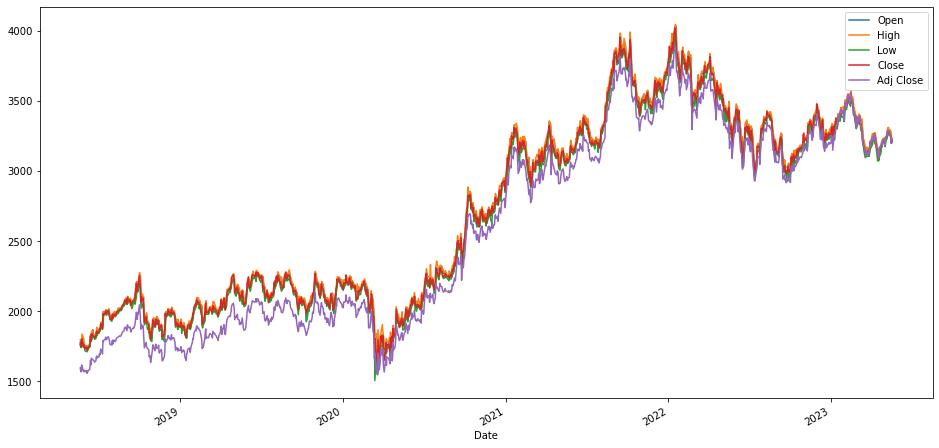

In [6]:
# visualation dataset
data[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(figsize=(16,8))
plt.show()

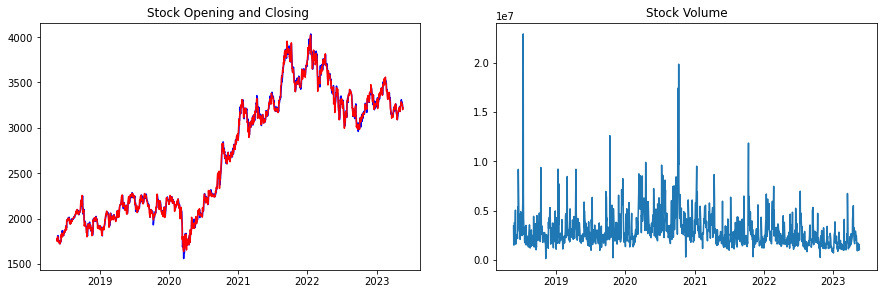

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(data["Open"],color="b")
plt.plot(data["Close"],color="r")
plt.title("Stock Opening and Closing ")
plt.subplot(2,2,2)
plt.plot(data["Volume"])
plt.title("Stock Volume")
plt.show()

In [8]:
# only focuse on close values the seprated close column
df = data["Close"]

In [9]:
# converting serires to datafram
df = pd.DataFrame(df)
df.head()

,Close
Date,
2018-05-21,1778.375000
2018-05-22,1754.449951
2018-05-23,1747.550049
2018-05-24,1801.849976
2018-05-25,1792.900024


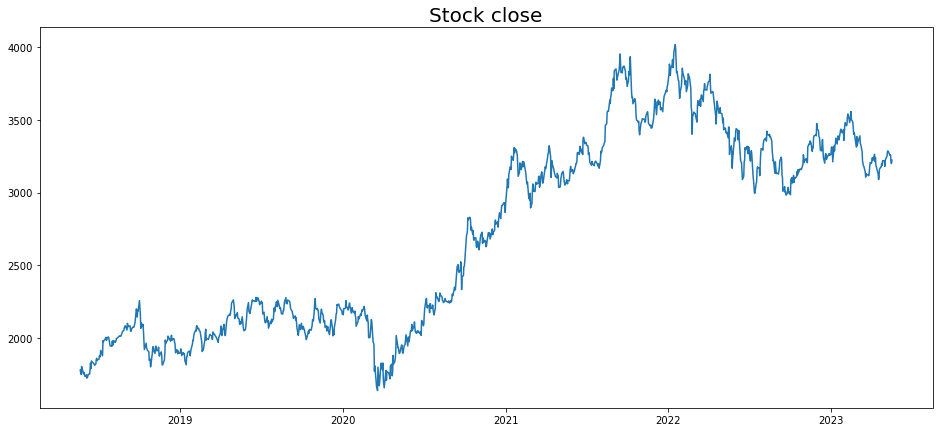

In [10]:
# visulation cloase header values
plt.figure(figsize=(16,7))
plt.plot(df["Close"])
plt.title("Stock close",size=20)
plt.show()

##  data preprocessing

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=["Close"])
df_scaled.index= df.index
df_scaled.head()


,Close
Date,
2018-05-21,0.059604
2018-05-22,0.049564
2018-05-23,0.046668
2018-05-24,0.069456
2018-05-25,0.065700


## Prepare the data with 100 legs

In [12]:
## shifting the data for train and test prediction
for i in range(100):
    df_scaled[f"Leg{i+1}"] = df_scaled["Close"].shift(i+1)

In [13]:
df_scaled.head()

,Close,Leg1,Leg2,Leg3,Leg4,Leg5,Leg6,Leg7,Leg8,Leg9,...,Leg91,Leg92,Leg93,Leg94,Leg95,Leg96,Leg97,Leg98,Leg99,Leg100
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-21,0.059604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-22,0.049564,0.059604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-23,0.046668,0.049564,0.059604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-24,0.069456,0.046668,0.049564,0.059604,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-25,0.065700,0.069456,0.046668,0.049564,0.059604,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
## drop null values
df_scaled = df_scaled.dropna(axis=0)
df_scaled.head()

,Close,Leg1,Leg2,Leg3,Leg4,Leg5,Leg6,Leg7,Leg8,Leg9,...,Leg91,Leg92,Leg93,Leg94,Leg95,Leg96,Leg97,Leg98,Leg99,Leg100
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-15,0.131421,0.118327,0.144200,0.170912,0.191141,0.185160,0.195694,0.179810,0.220959,0.259862,...,0.040331,0.043940,0.050655,0.052627,0.048126,0.065700,0.069456,0.046668,0.049564,0.059604
2018-10-16,0.136793,0.131421,0.118327,0.144200,0.170912,0.191141,0.185160,0.195694,0.179810,0.220959,...,0.045283,0.040331,0.043940,0.050655,0.052627,0.048126,0.065700,0.069456,0.046668,0.049564
2018-10-17,0.122986,0.136793,0.131421,0.118327,0.144200,0.170912,0.191141,0.185160,0.195694,0.179810,...,0.035777,0.045283,0.040331,0.043940,0.050655,0.052627,0.048126,0.065700,0.069456,0.046668
2018-10-19,0.116187,0.122986,0.136793,0.131421,0.118327,0.144200,0.170912,0.191141,0.185160,0.195694,...,0.037519,0.035777,0.045283,0.040331,0.043940,0.050655,0.052627,0.048126,0.065700,0.069456
2018-10-22,0.111906,0.116187,0.122986,0.136793,0.131421,0.118327,0.144200,0.170912,0.191141,0.185160,...,0.041632,0.037519,0.035777,0.045283,0.040331,0.043940,0.050655,0.052627,0.048126,0.065700


## x,y split

In [15]:
x= df_scaled.iloc[:,1:]
y = df_scaled["Close"]

## Train Test spliting

In [16]:
n = int(0.8*len(x))
n

908

In [17]:
xtrain,ytrain = x[:n+1], y[:n+1]
xtest,ytest = x[n:],y[n:]

In [18]:
xtrain.shape

(909, 100)

In [19]:
xtest.shape

(227, 100)

## model building LSTM

1. LSTM is a type of RNN with memory cells. It uses forget, input, and output gates to selectively remember, update, and output information. It captures long-term dependencies in sequential data, making it valuable for tasks like language processing and time series analysis.

In [20]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [21]:
nn = Sequential()

In [22]:
nn.add(LSTM(50,return_sequences=True,input_shape=(xtrain.shape[1],1)))
nn.add(Dropout(0.2))

nn.add(LSTM(50,return_sequences=True))
nn.add(Dropout(0.2))

nn.add(LSTM(50))
nn.add(Dropout(0.2))

nn.add(Dense(1,activation="linear"))


In [23]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [24]:
nn.compile(loss="mse",optimizer="adam",metrics=["mae"])

In [25]:
hist = nn.fit(xtrain,ytrain,epochs=40)

Epoch 1/40
29/29 [==============================] - 26s 297ms/step - loss: 0.0542 - mae: 0.1693
Epoch 2/40
29/29 [==============================] - 9s 314ms/step - loss: 0.0185 - mae: 0.1082
Epoch 3/40
29/29 [==============================] - 9s 313ms/step - loss: 0.0161 - mae: 0.1012
Epoch 4/40
29/29 [==============================] - 9s 312ms/step - loss: 0.0160 - mae: 0.1020
Epoch 5/40
29/29 [==============================] - 9s 310ms/step - loss: 0.0153 - mae: 0.0990
Epoch 6/40
29/29 [==============================] - 9s 306ms/step - loss: 0.0135 - mae: 0.0938
Epoch 7/40
29/29 [==============================] - 9s 312ms/step - loss: 0.0137 - mae: 0.0933
Epoch 8/40
29/29 [==============================] - 9s 303ms/step - loss: 0.0109 - mae: 0.0818
Epoch 9/40
29/29 [==============================] - 9s 309ms/step - loss: 0.0087 - mae: 0.0727
Epoch 10/40
29/29 [==============================] - 9s 308ms/step - loss: 0.0081 - mae: 0.0687
Epoch 11/40
29/29 [=============================

## Observing learning curve

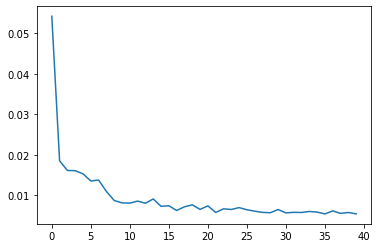

In [26]:
plt.plot(hist.history["loss"])
plt.title("Learning curve")
plt.show()

## evaluate

In [27]:
nn.evaluate(xtrain,ytrain)

29/29 [==============================] - 7s 92ms/step - loss: 0.0049 - mae: 0.0550


[0.004885098896920681, 0.05495193228125572]

In [28]:
nn.evaluate(xtest,ytest)

8/8 [==============================] - 1s 83ms/step - loss: 0.0201 - mae: 0.1265


[0.020116038620471954, 0.1264752298593521]

## prediction

In [29]:
tr_pred = nn.predict(xtrain)
ts_pred = nn.predict(xtest)

8/8 [==============================] - 1s 81ms/step


In [30]:
tr_pred[:5]

array([[0.23139608],
       [0.22651368],
       [0.22189678],
       [0.21656209],
       [0.21095864]], dtype=float32)

In [31]:
tr_pred = scaler.inverse_transform(tr_pred)
tr_pred[:5]

array([[2187.7205],
       [2176.0867],
       [2165.0857],
       [2152.374 ],
       [2139.0222]], dtype=float32)

In [32]:
ts_pred = scaler.inverse_transform(ts_pred)
ts_pred[:5]

array([[3662.3354],
       [3661.4597],
       [3660.564 ],
       [3659.5735],
       [3658.4094]], dtype=float32)

In [33]:
y_train = pd.DataFrame(ytrain)
ytrain_ord = scaler.inverse_transform(y_train)
ytrain_ord[:5]

array([[1949.5       ],
       [1962.30004883],
       [1929.40002441],
       [1913.19995117],
       [1903.        ]])

In [34]:
y_test = pd.DataFrame(ytest)
ytest_org = scaler.inverse_transform(y_test)
ytest_org[:5]

array([[3112.39990234],
       [3211.94995117],
       [3222.94995117],
       [3308.80004883],
       [3293.10009766]])

## visualization train, test prediction 

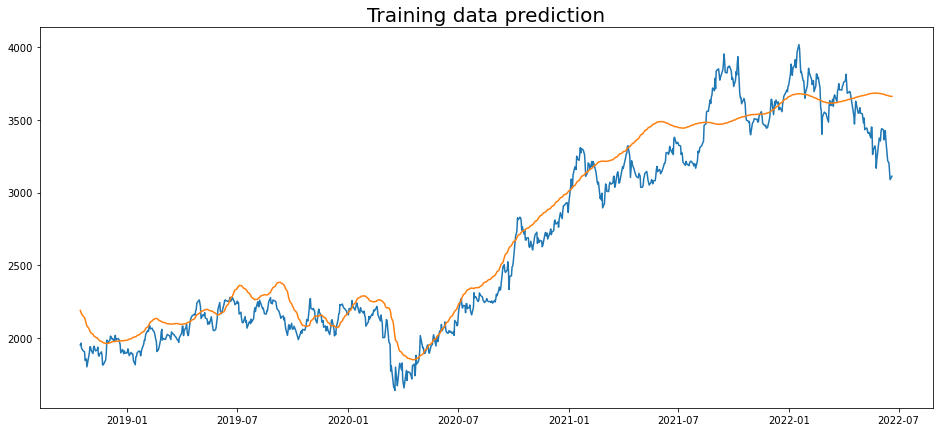

In [35]:
plt.figure(figsize=(16,7))
plt.plot(ytrain.index,ytrain_ord)
plt.plot(ytrain.index,tr_pred)
plt.title("Training data prediction",size=20)
plt.show()

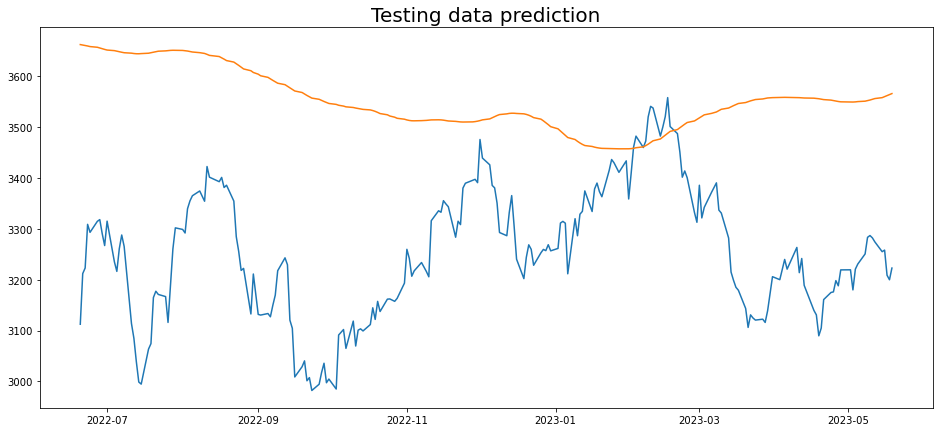

In [36]:
plt.figure(figsize=(16,7))
plt.plot(ytest.index,ytest_org)
plt.plot(ytest.index,ts_pred)
plt.title("Testing data prediction",size=20)
plt.show()

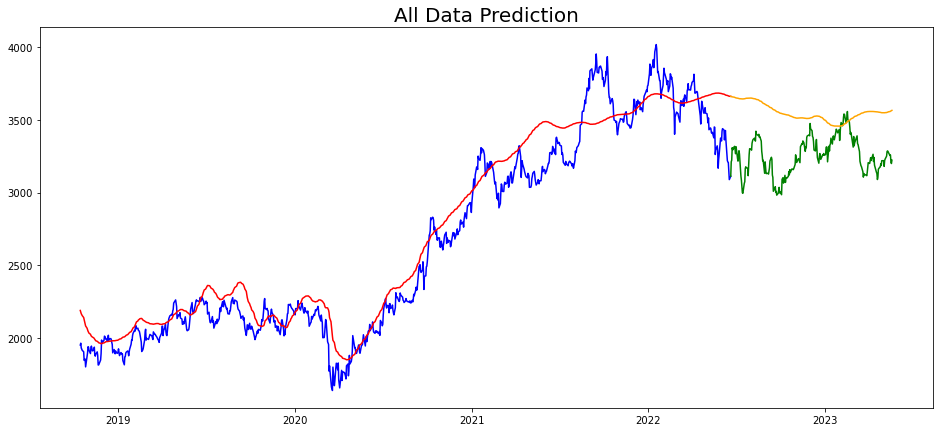

In [37]:
plt.figure(figsize=(16,7))
plt.plot(ytrain.index,ytrain_ord,color="b")
plt.plot(ytrain.index,tr_pred,color="r")
plt.plot(ytest.index,ytest_org,color="green")
plt.plot(ytest.index,ts_pred,color="orange")
plt.title("All Data Prediction",size=20)
plt.show()